<a href="https://colab.research.google.com/github/lenow520/UCI-Beijing-PM2.5/blob/main/preprocesseddata.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Import dataset

In [176]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [177]:
import pandas as pd
PRSA=pd.read_csv('/content/drive/My Drive/PRSA_data.csv')
PRSA.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43824 entries, 0 to 43823
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   No      43824 non-null  int64  
 1   year    43824 non-null  int64  
 2   month   43824 non-null  int64  
 3   day     43824 non-null  int64  
 4   hour    43824 non-null  int64  
 5   pm2.5   41757 non-null  float64
 6   DEWP    43824 non-null  int64  
 7   TEMP    43824 non-null  float64
 8   PRES    43824 non-null  float64
 9   cbwd    43824 non-null  object 
 10  Iws     43824 non-null  float64
 11  Is      43824 non-null  int64  
 12  Ir      43824 non-null  int64  
dtypes: float64(4), int64(8), object(1)
memory usage: 4.3+ MB


## Plot diagrams showing the features

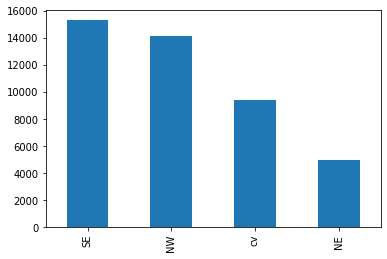

In [178]:
PRSA['cbwd'].value_counts().plot(kind='bar')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f38d702d780>,
      dtype=object)

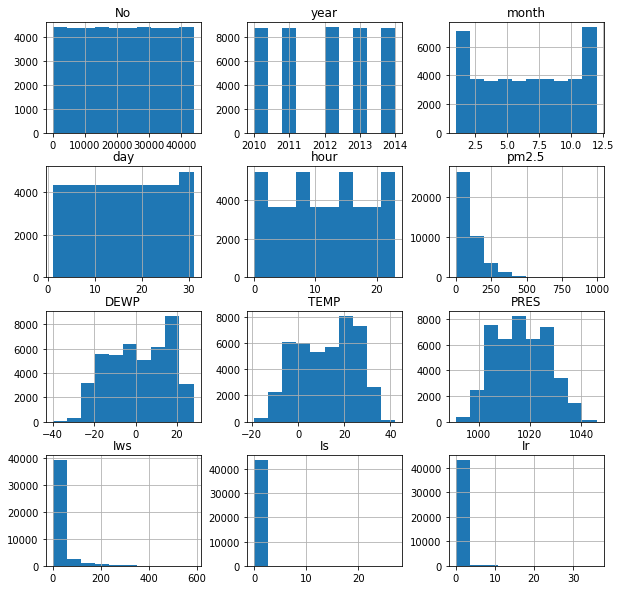

In [179]:
PRSA.hist(figsize=(10,10))

             No          year         month  ...       Iws        Is        Ir
No     1.000000  9.797958e-01  1.993007e-01  ... -0.062427 -0.029464 -0.016563
year   0.979796  1.000000e+00 -3.575502e-16  ... -0.064244 -0.017002 -0.024383
month  0.199301 -3.575502e-16  1.000000e+00  ...  0.003043 -0.061672  0.036737
day    0.018808 -1.663879e-16  1.079604e-02  ... -0.008954 -0.036826  0.002681
hour   0.000547  0.000000e+00 -1.528210e-17  ...  0.056618 -0.002374 -0.006286
pm2.5 -0.017706 -1.469020e-02 -2.406878e-02  ... -0.247784  0.019266 -0.051369
DEWP   0.047668  1.121574e-03  2.339746e-01  ... -0.296399 -0.034410  0.125090
TEMP   0.078159  4.552854e-02  1.700926e-01  ... -0.154623 -0.092601  0.049121
PRES  -0.024224 -1.257001e-02 -6.218507e-02  ...  0.185355  0.069028 -0.079843
Iws   -0.062427 -6.424368e-02  3.043299e-03  ...  1.000000  0.021883 -0.010122
Is    -0.029464 -1.700207e-02 -6.167206e-02  ...  0.021883  1.000000 -0.009548
Ir    -0.016563 -2.438290e-02  3.673715e-02  ... -0.

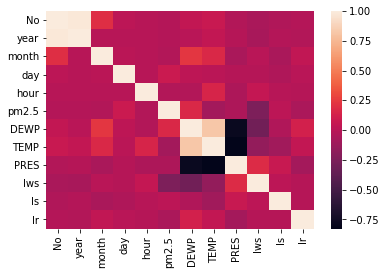

In [180]:
import seaborn as sns
#Correlations between numeric features
cor=PRSA.corr()
print(cor)
#Plot heatmap
sns.heatmap(cor)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f38d739ab00>]],
      dtype=object)

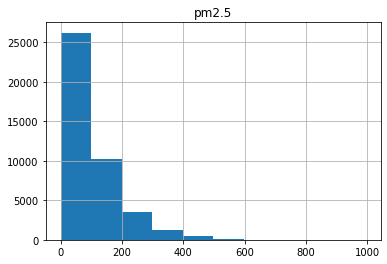

In [181]:
#the diagram showing the pm2.5 distribution
PRSA.hist(column='pm2.5') 

## Data preprocessing

In [182]:
PRSA['pm2.5'].fillna(PRSA['pm2.5'].mean(),inplace=True)
PRSA

,No,year,month,day,hour,pm2.5,DEWP,TEMP,PRES,cbwd,Iws,Is,Ir
0,1,2010,1,1,0,98.613215,-21,-11.0,1021.0,NW,1.79,0,0
1,2,2010,1,1,1,98.613215,-21,-12.0,1020.0,NW,4.92,0,0
2,3,2010,1,1,2,98.613215,-21,-11.0,1019.0,NW,6.71,0,0
3,4,2010,1,1,3,98.613215,-21,-14.0,1019.0,NW,9.84,0,0
4,5,2010,1,1,4,98.613215,-20,-12.0,1018.0,NW,12.97,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
43819,43820,2014,12,31,19,8.000000,-23,-2.0,1034.0,NW,231.97,0,0
43820,43821,2014,12,31,20,10.000000,-22,-3.0,1034.0,NW,237.78,0,0
43821,43822,2014,12,31,21,10.000000,-22,-3.0,1034.0,NW,242.70,0,0
43822,43823,2014,12,31,22,8.000000,-22,-4.0,1034.0,NW,246.72,0,0


In [183]:
PRSA['cbwd']=PRSA['cbwd'].astype('category')
PRSA.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43824 entries, 0 to 43823
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype   
---  ------  --------------  -----   
 0   No      43824 non-null  int64   
 1   year    43824 non-null  int64   
 2   month   43824 non-null  int64   
 3   day     43824 non-null  int64   
 4   hour    43824 non-null  int64   
 5   pm2.5   43824 non-null  float64 
 6   DEWP    43824 non-null  int64   
 7   TEMP    43824 non-null  float64 
 8   PRES    43824 non-null  float64 
 9   cbwd    43824 non-null  category
 10  Iws     43824 non-null  float64 
 11  Is      43824 non-null  int64   
 12  Ir      43824 non-null  int64   
dtypes: category(1), float64(4), int64(8)
memory usage: 4.1 MB


In [184]:
PRSA = PRSA.drop(['No'],axis=1)

In [185]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
PRSA['cbwd']=le.fit_transform(PRSA['cbwd'])
PRSA

,year,month,day,hour,pm2.5,DEWP,TEMP,PRES,cbwd,Iws,Is,Ir
0,2010,1,1,0,98.613215,-21,-11.0,1021.0,1,1.79,0,0
1,2010,1,1,1,98.613215,-21,-12.0,1020.0,1,4.92,0,0
2,2010,1,1,2,98.613215,-21,-11.0,1019.0,1,6.71,0,0
3,2010,1,1,3,98.613215,-21,-14.0,1019.0,1,9.84,0,0
4,2010,1,1,4,98.613215,-20,-12.0,1018.0,1,12.97,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
43819,2014,12,31,19,8.000000,-23,-2.0,1034.0,1,231.97,0,0
43820,2014,12,31,20,10.000000,-22,-3.0,1034.0,1,237.78,0,0
43821,2014,12,31,21,10.000000,-22,-3.0,1034.0,1,242.70,0,0
43822,2014,12,31,22,8.000000,-22,-4.0,1034.0,1,246.72,0,0


In [186]:
bins = [-1, 35, 75, 115, 150, 250, 994]

binning = pd.cut(PRSA['pm2.5'], bins,labels=['excellent', 'good', 'light', 'moderate','heavy', 'severe']) 
print(pd.value_counts(binning))

excellent    12120
good          9391
light         9189
heavy         5938
moderate      4133
severe        3053
Name: pm2.5, dtype: int64


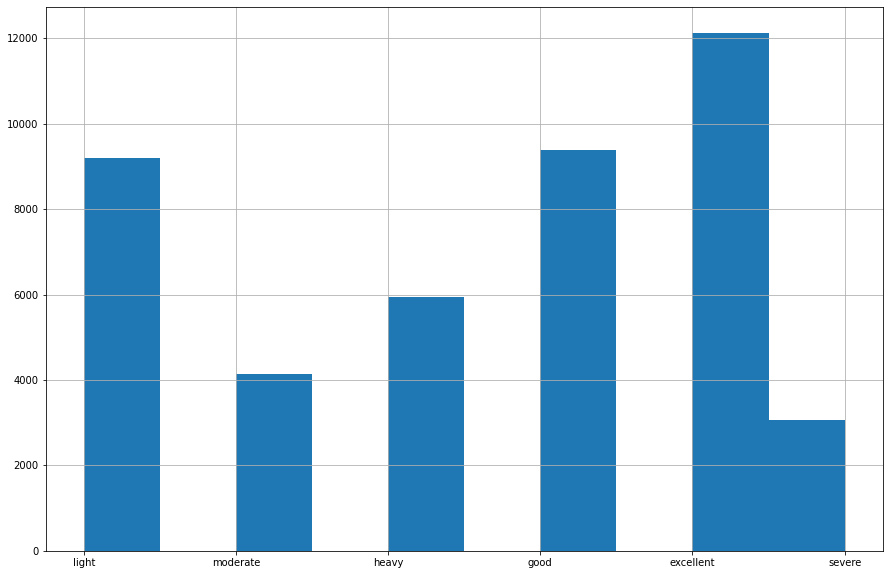

In [187]:
binning.hist(figsize=(15,10))

In [188]:
PRSA

,year,month,day,hour,pm2.5,DEWP,TEMP,PRES,cbwd,Iws,Is,Ir
0,2010,1,1,0,98.613215,-21,-11.0,1021.0,1,1.79,0,0
1,2010,1,1,1,98.613215,-21,-12.0,1020.0,1,4.92,0,0
2,2010,1,1,2,98.613215,-21,-11.0,1019.0,1,6.71,0,0
3,2010,1,1,3,98.613215,-21,-14.0,1019.0,1,9.84,0,0
4,2010,1,1,4,98.613215,-20,-12.0,1018.0,1,12.97,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
43819,2014,12,31,19,8.000000,-23,-2.0,1034.0,1,231.97,0,0
43820,2014,12,31,20,10.000000,-22,-3.0,1034.0,1,237.78,0,0
43821,2014,12,31,21,10.000000,-22,-3.0,1034.0,1,242.70,0,0
43822,2014,12,31,22,8.000000,-22,-4.0,1034.0,1,246.72,0,0


In [189]:
"""
from sklearn.preprocessing import StandardScaler
col_names=['DEWP','TEMP','PRES','Iws','Is','Ir']
scaler=StandardScaler().fit(PRSA[col_names].values)
PRSA[col_names]=scaler.transform(PRSA[col_names].values)
PRSA
"""

"\nfrom sklearn.preprocessing import StandardScaler\ncol_names=['DEWP','TEMP','PRES','Iws','Is','Ir']\nscaler=StandardScaler().fit(PRSA[col_names].values)\nPRSA[col_names]=scaler.transform(PRSA[col_names].values)\nPRSA\n"

In [190]:
from sklearn.preprocessing import Normalizer
col_names=['pm2.5','DEWP','TEMP','PRES','Iws','Is','Ir']
features=PRSA[col_names]
normalizer=Normalizer(norm='max')
features=normalizer.transform(features.values)
PRSA[col_names]=features
PRSA

,year,month,day,hour,pm2.5,DEWP,TEMP,PRES,cbwd,Iws,Is,Ir
0,2010,1,1,0,0.096585,-0.020568,-0.010774,1.0,1,0.001753,0.0,0.0
1,2010,1,1,1,0.096680,-0.020588,-0.011765,1.0,1,0.004824,0.0,0.0
2,2010,1,1,2,0.096774,-0.020608,-0.010795,1.0,1,0.006585,0.0,0.0
3,2010,1,1,3,0.096774,-0.020608,-0.013739,1.0,1,0.009657,0.0,0.0
4,2010,1,1,4,0.096870,-0.019646,-0.011788,1.0,1,0.012741,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
43819,2014,12,31,19,0.007737,-0.022244,-0.001934,1.0,1,0.224342,0.0,0.0
43820,2014,12,31,20,0.009671,-0.021277,-0.002901,1.0,1,0.229961,0.0,0.0
43821,2014,12,31,21,0.009671,-0.021277,-0.002901,1.0,1,0.234720,0.0,0.0
43822,2014,12,31,22,0.007737,-0.021277,-0.003868,1.0,1,0.238607,0.0,0.0


In [195]:
import pandas as pd
from sklearn.model_selection import train_test_split
#split data into train and test sets
X=PRSA.drop(['pm2.5'],axis=1)
y=binning

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=100)
list1=[X_train,X_test,y_train,y_test]
print(list1)

[       year  month  day  hour      DEWP  ...  PRES  cbwd       Iws   Is        Ir
36709  2014      3   10    13 -0.007820  ...   1.0     2  0.001750  0.0  0.000000
14327  2011      8   20    23  0.019763  ...   1.0     2  0.001769  0.0  0.000000
18119  2012      1   25    23 -0.017613  ...   1.0     3  0.000871  0.0  0.000000
15430  2011     10    5    22  0.003941  ...   1.0     0  0.003961  0.0  0.000000
23970  2012      9   25    18  0.013739  ...   1.0     0  0.004828  0.0  0.002944
...     ...    ...  ...   ...       ...  ...   ...   ...       ...  ...       ...
16304  2011     11   11     8 -0.000984  ...   1.0     1  0.003081  0.0  0.000000
79     2010      1    4     7 -0.020448  ...   1.0     1  0.071811  0.0  0.000000
12119  2011      5   20    23 -0.001970  ...   1.0     2  0.014099  0.0  0.000000
14147  2011      8   13    11  0.025000  ...   1.0     2  0.026840  0.0  0.000000
38408  2014      5   20     8  0.007960  ...   1.0     0  0.018687  0.0  0.000000

[35059 rows x 